## Implementing Linear Regression on Fish Dataset

In [1]:
# %matplotlib notebook
# %matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


plt.style.use('ggplot')

Load dataset as a dataframe and choose `Length1` and `Length3` columns as features. 

In [2]:
data = pd.read_csv('../datasets/Fish.csv')
# data = data[data['Species'].isin(['Bream', 'Roach'])]
data = data[['Length1','Length3']]
data = data.where(data.Length3 < 50)


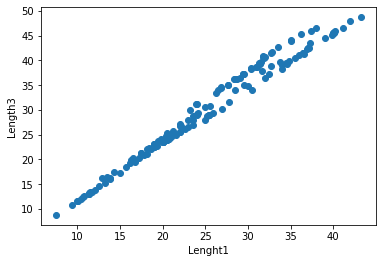

In [3]:
plt.scatter(data.Length1, data.Length3)
plt.xlabel('Lenght1')
plt.ylabel('Length3')
plt.show()

In [6]:
class regression :
    def __init__(self, alpha):
        self.alpha = alpha
        self.theta_initializer()

    def hypothesis(self, x):
        return (self.theta0 + self.theta1 * x)
    
    def theta_initializer(self):
        self.theta0, self.theta1 = np.random.randn(2)
    
    def cost_function(self, x, y, th1):
        '''the implemented cost funtion is sum of squared errors devided by 2'''
        h_t = th1 * x
        cost = ((h_t - y)**2).sum() * 1/2
        return cost


    def fit(self, x, y):
        temp_theta0 = self.theta0 - self.alpha * (self.hypothesis(x) - y).sum()
        temp_theta1 = self.theta1 - self.alpha * ((self.hypothesis(x) - y)*x).sum()
        self.theta0 = temp_theta0
        self.theta1 = temp_theta1

        

test = np.arange(start=5, stop=50, step=0.5)
results = []
losses = []

regressor = regression(0.000002)


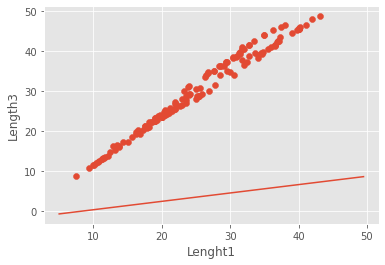

-1.6900134977024739 0.2090740724748187


In [11]:
plt.scatter(data.Length1, data.Length3)
plt.xlabel('Lenght1')
plt.ylabel('Length3')
plt.plot(test, regressor.hypothesis(test))


# regressor.fit(data.Length1, data.Length3)
plt.show()
print(regressor.theta0, regressor.theta1)


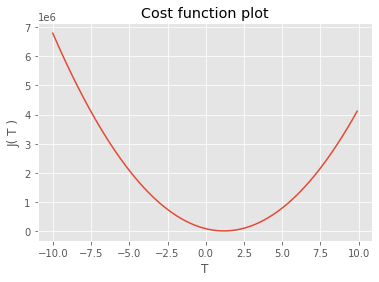

In [12]:
losses = []
Xs =  np.arange(start=-10, stop=10, step=0.1)
for i in Xs:
    losses.append(regressor.cost_function(data.Length1, data.Length3, i))
plt.title("Cost function plot")
plt.xlabel("T")
plt.ylabel("J( T )")
plt.plot(Xs, losses)
plt.show()

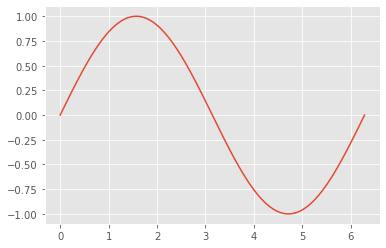

In [18]:
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

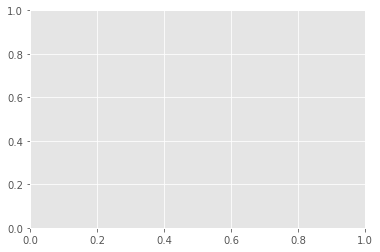

In [21]:
fig1, ax = plt.subplots()

regressor = regression(0.000002)

def animate(i):
    ax.cla()
    ax.scatter(data.Length1, data.Length3)
    ax.set_xlabel('Lenght1')
    ax.set_ylabel('Length3')
    ax.plot(test, regressor.hypothesis(test))
    regressor.fit(data.Length1, data.Length3)
    

ani = FuncAnimation(fig, animate, interval=300, frames=20)

# plt.tight_layout()


# time.sleep(10)
# plt.close()


In [22]:
HTML(ani.to_html5_video())